In [2]:
import sys, os, torch
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

# move directory
os.chdir("..")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

,model,F1-score,AUC,Precision,Recall,Prediction-time
0,DilatedTCN,0.86,0.884,0.98,0.77,10.0ms
1,DilatedTCN,0.80,0.862,0.90,0.73,20.0ms
2,DilatedTCN,0.74,0.833,0.83,0.67,30.0ms
3,DilatedTCN,0.72,0.810,0.84,0.63,40.0ms
4,DilatedTCN,0.68,0.792,0.78,0.60,50.0ms
5,Bayesian-DilatedTCN,0.85,0.890,0.94,0.78,10.0ms
6,Bayesian-DilatedTCN,0.78,0.852,0.87,0.71,20.0ms
7,Bayesian-DilatedTCN,0.74,0.825,0.86,0.66,30.0ms
8,Bayesian-DilatedTCN,0.71,0.800,0.85,0.61,40.0ms
9,Bayesian-DilatedTCN,0.66,0.775,0.78,0.57,50.0ms


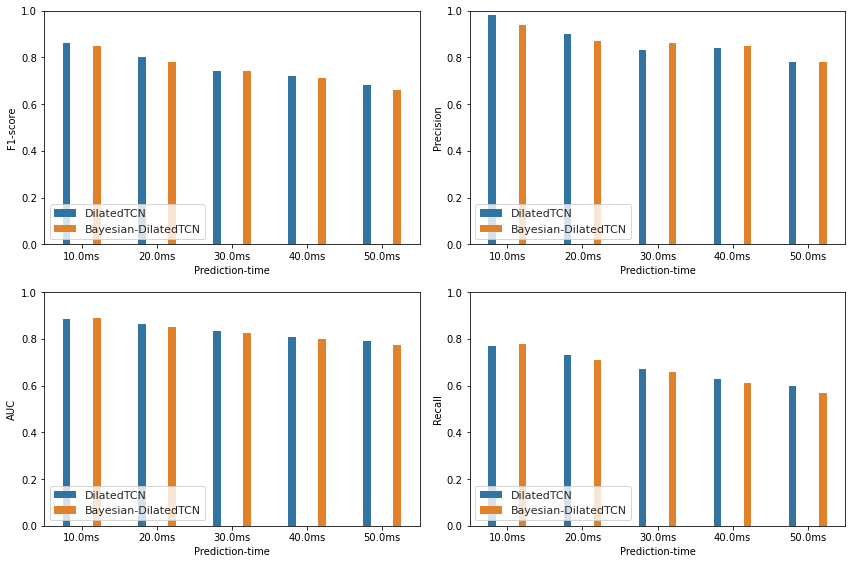

In [3]:
model_list = ['DilatedTCN']*5+['Bayesian-DilatedTCN']*5
dist_list = ["{:.1f}ms".format(10.0 * i) for i in [1,2,3,4,5]] * 2 
f1_list = [0.86, 0.80, 0.74, 0.72, 0.68] + [0.85, 0.78, 0.74, 0.71, 0.66]
auc_list = [0.884, 0.862, 0.833, 0.81, 0.792] + [0.89, 0.852, 0.825, 0.80, 0.775]
dis_pre_list = [0.98, 0.90, 0.83, 0.84, 0.78] + [0.94, 0.87, 0.86, 0.85, 0.78]
dis_rec_list = [0.77,0.73, 0.67, 0.63, 0.60] + [0.78, 0.71, 0.66, 0.61, 0.57]

df_exp_algorithm = pd.DataFrame({
    "model":model_list,
    "F1-score":f1_list,
    "AUC":auc_list,
    "Precision":dis_pre_list,
    "Recall":dis_rec_list,
    "Prediction-time":dist_list
})

fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])

sns.set_theme(style="whitegrid") ## figure, axes 스타일
width = 0.1

for i in range(0,4):
    for bar in axes.ravel()[i].patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
        
    axes.ravel()[i].legend(loc='lower left')
    axes.ravel()[i].set_ylim([0,1.0])
    
fig.tight_layout()

df_exp_algorithm.groupby(by="model").apply(lambda x : x[:])

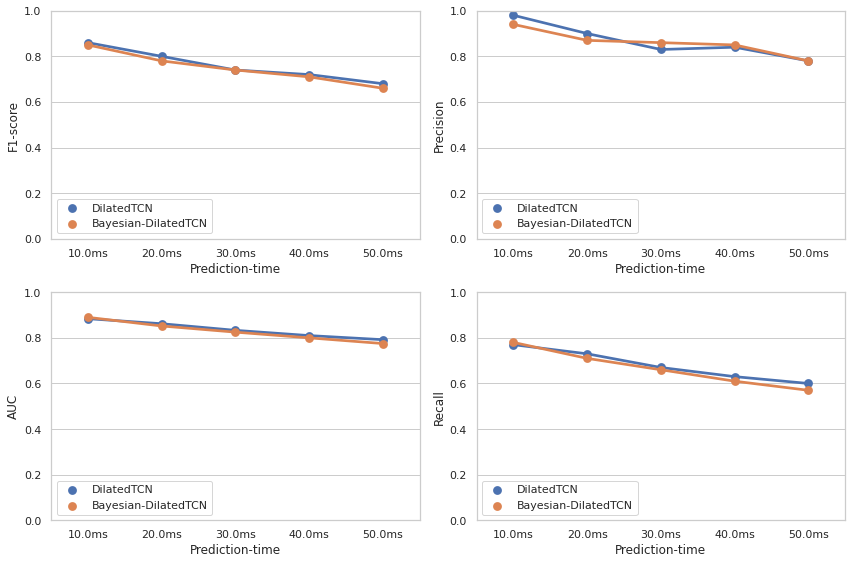

In [4]:
fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
axes[0,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
axes[1,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1], )
axes[0,1].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])
axes[1,1].legend(loc='lower left')

axes[0,0].set_ylim([0,1.0])
axes[1,0].set_ylim([0,1.0])
axes[0,1].set_ylim([0,1.0])
axes[1,1].set_ylim([0,1.0])
fig.tight_layout()

In [5]:
["{:.3f}ms".format(4.76 * 4 * i) for i in [1,2,3,4,5]]

['19.040ms', '38.080ms', '57.120ms', '76.160ms', '95.200ms']

,model,F1-score,AUC,Precision,Recall,Prediction-time
0,Transformer,0.70,0.885,0.640,0.78,20.0ms
1,Transformer,0.76,0.831,0.880,0.67,40.0ms
2,Transformer,0.73,0.837,0.780,0.69,60.0ms
3,Transformer,0.67,0.800,0.740,0.62,80.0ms
4,Transformer,0.65,0.761,0.840,0.53,100.0ms
5,CnnLSTM,0.72,0.805,0.860,0.61,20.0ms
6,CnnLSTM,0.83,0.855,0.990,0.71,40.0ms
7,CnnLSTM,0.72,0.782,0.980,0.57,60.0ms
8,CnnLSTM,0.65,0.804,0.670,0.64,80.0ms
9,CnnLSTM,0.63,0.791,0.630,0.62,100.0ms


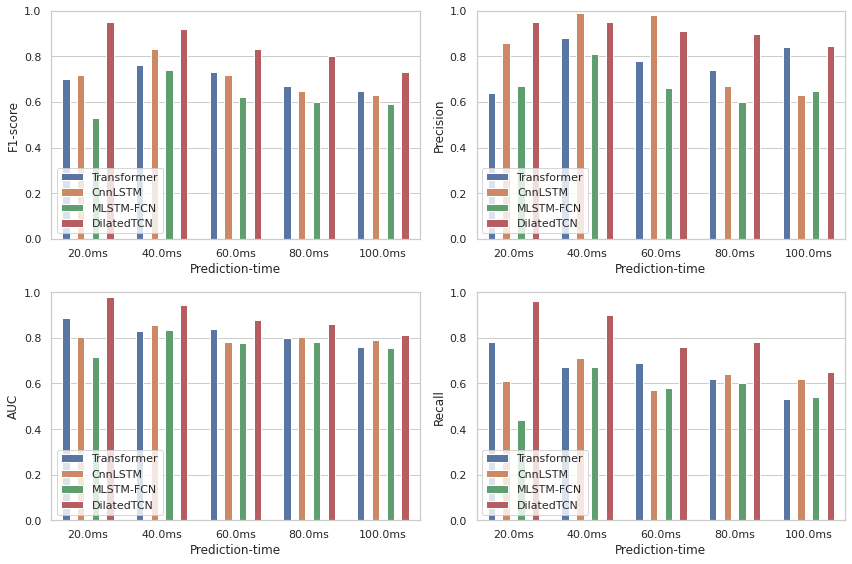

In [6]:
# Graph for publishing paper : Model comparison for 0D data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparison between previous research and current research
model_list = ['Transformer']*5+['CnnLSTM']*5 + ['MLSTM-FCN']*5 + ['DilatedTCN']*5
dist_list = ["{:.1f}ms".format(10 * i) for i in [2, 4, 6, 8, 10]] * 4
f1_list = [0.70,0.76,0.73,0.67,0.65] + [0.72, 0.83, 0.72, 0.65, 0.63] + [0.53,0.74,0.62,0.60,0.59] + [0.95, 0.92, 0.83, 0.80, 0.73]
auc_list = [0.885,0.831,0.837,0.80,0.761] + [0.805,0.855,0.782,0.804,0.791] + [0.716, 0.833,0.778,0.780,0.755] + [0.977, 0.946, 0.877, 0.86, 0.814]
dis_pre_list = [0.64,0.88,0.78,0.74,0.84] + [0.86,0.99,0.98,0.67,0.63] + [0.67,0.81,0.66,0.60,0.65] + [0.95, 0.95, 0.91,0.90, 0.845]
dis_rec_list = [0.78,0.67,0.69,0.62,0.53] + [0.61,0.71,0.57,0.64,0.62] + [0.44,0.67,0.58,0.60,0.54] + [0.96, 0.90, 0.76,0.78, 0.65]

df_exp_algorithm = pd.DataFrame({
    "model":model_list,
    "F1-score":f1_list,
    "AUC":auc_list,
    "Precision":dis_pre_list,
    "Recall":dis_rec_list,
    "Prediction-time":dist_list
})

fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])

sns.set_theme(style="whitegrid") ## figure, axes 스타일
width = 0.1

for i in range(0,4):
    for bar in axes.ravel()[i].patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
        
    axes.ravel()[i].legend(loc='lower left')
    axes.ravel()[i].set_ylim([0,1.0])
    
fig.tight_layout()

df_exp_algorithm.groupby(by="model").apply(lambda x : x[:])

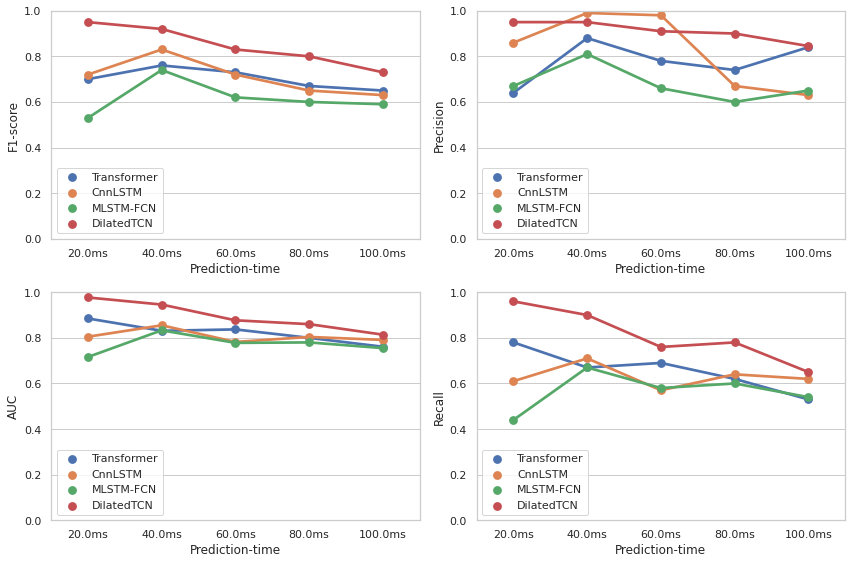

In [7]:
fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
axes[0,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
axes[1,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1], )
axes[0,1].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])
axes[1,1].legend(loc='lower left')

axes[0,0].set_ylim([0,1.0])
axes[1,0].set_ylim([0,1.0])
axes[0,1].set_ylim([0,1.0])
axes[1,1].set_ylim([0,1.0])
fig.tight_layout()

In [4]:
# uncertainty analysis
import pandas as pd
result = pd.read_pickle("./results/analysis_file/analysis_uncertainty_test_Bayes_TCN_warning_100_dist_40_Focal_Normal_Robust_TQ_seed_42.pkl")

In [5]:
result['preds_mean'] = result['preds'].apply(lambda x : np.mean(x, axis = 0)[0])
result['preds_dev'] = result['preds'].apply(lambda x : np.std(x))

In [6]:
result.head()

,au,eu,preds,shot,cases,dist,label,preds_mean,preds_dev
0,0.156589,0.000445,"[[0.82928395], [0.79221827], [0.78355116], [0....",31384,TP,-0.004892,1.0,0.796234,0.022514
1,0.146570,0.000424,"[[0.16746289], [0.19091317], [0.21183605], [0....",25625,FN,0.017895,1.0,0.178168,0.021329
2,0.236154,0.001199,"[[0.6551578], [0.64356166], [0.58284646], [0.6...",26278,TP,0.011870,1.0,0.609241,0.027958
3,0.072743,0.000162,"[[0.92249036], [0.9210298], [0.9235272], [0.92...",31810,TP,0.034096,1.0,0.921150,0.009732
4,0.020377,0.000007,"[[0.021433529], [0.016921703], [0.020836916], ...",29597,TN,9.878129,0.0,0.020431,0.003272


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


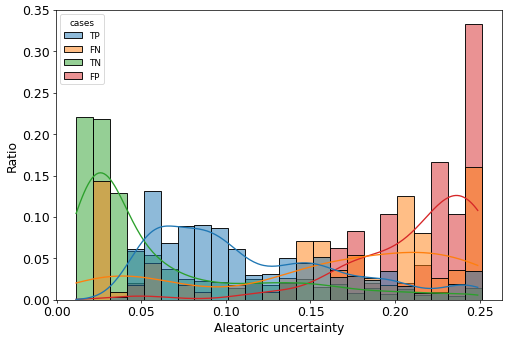

In [21]:
plt.figure(figsize = (9,6), dpi = 64)
sns.histplot(data = result, x = 'au', hue = 'cases', kde = True, stat = 'probability', common_norm=False, binwidth=0.01, legend = True)
plt.xlabel("Aleatoric uncertainty", fontsize = 14)
plt.xticks(fontsize=14)
plt.ylabel("Ratio", fontsize = 14)
plt.yticks(fontsize=14)
plt.savefig("./results/analysis_file/aleatoric_uncertainty_distribution.eps")
plt.savefig("./results/analysis_file/aleatoric_uncertainty_distribution.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


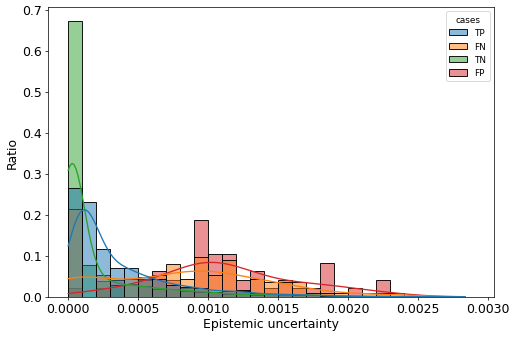

In [18]:
plt.figure(figsize = (9,6), dpi = 64)
sns.histplot(data = result, x = 'eu', hue = 'cases', kde = True, stat = 'probability', common_norm=False, binwidth=0.0001)
plt.xlabel("Epistemic uncertainty", fontsize = 14)
plt.xticks(fontsize=14)
plt.ylabel("Ratio",fontsize = 14)
plt.yticks(fontsize=14)
plt.savefig("./results/analysis_file/epistemic_uncertainty_distribution.eps")
plt.savefig("./results/analysis_file/epistemic_uncertainty_distribution.png")

<AxesSubplot:xlabel='preds_dev', ylabel='Probability'>

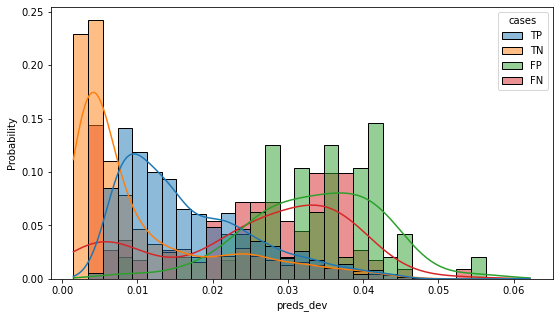

In [178]:
plt.figure(figsize = (9,5))
sns.histplot(data = result, x = 'preds_dev', hue = 'cases', kde = True, stat = 'probability', common_norm=False)

<AxesSubplot:xlabel='eu', ylabel='preds_mean'>

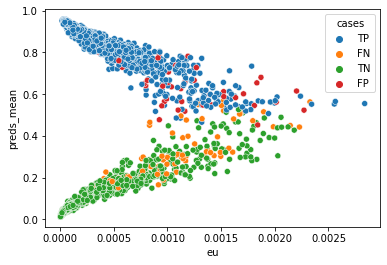

In [233]:
sns.scatterplot(data = result, x = 'eu', y = 'preds_mean', hue = 'cases')

<AxesSubplot:xlabel='preds_dev', ylabel='preds_mean'>

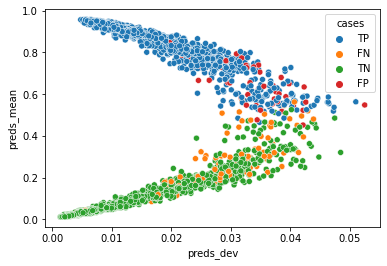

In [234]:
sns.scatterplot(data = result, x = 'preds_dev', y = 'preds_mean', hue = 'cases')

In [107]:
len(result['shot'].unique())

61

In [56]:
(result['cases'] == 'TN').sum()

1826

In [37]:
(result['cases'] == 'TP').sum()

654

In [38]:
len(result['shot'][result['cases'] == 'TP'].unique())

60

In [39]:
(result['cases'] == 'FP').sum()

51

In [40]:
len(result['shot'][result['cases'] == 'FP'].unique())

16

In [41]:
(result['cases'] == 'FN').sum()

48

In [42]:
len(result['shot'][result['cases'] == 'FN'].unique())

10

(0.0, 1.0)

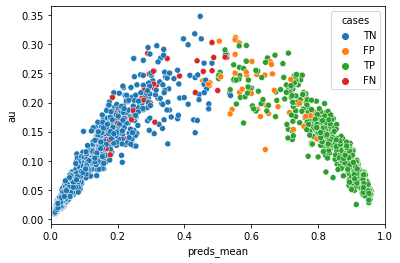

In [43]:
sns.scatterplot(x = 'preds_mean', y = 'au', data = result, hue = 'cases')
plt.xlim([0,1.0])

### EpiCC: A Bayesian neural network model with uncertainty correction
- OLS for correcting the output probability through uncertainty
- Inverse transform of OLS function to correct the output probability

In [9]:
from sklearn.linear_model import LinearRegression
prob = result['preds_mean']
au = result['au']
eu = result['eu']
label = result['label']
func_prob = np.log(prob / (1 - prob))

ols = LinearRegression()
x = np.sqrt(eu).values.reshape(-1,1) / np.max(np.sqrt(eu).values.reshape(-1,1))
y = func_prob.values.reshape(-1,1)
ols.fit(x, y)

LinearRegression()

In [10]:
func_prob_pred = ols.predict(x).reshape(-1)
np.abs(func_prob - func_prob_pred).sum()

6775.545

In [11]:
alpha = ols.intercept_[0]
beta = ols.coef_[0]
prob_corr = np.exp(prob.values.reshape(-1) - x.reshape(-1) * beta) /(np.exp(prob.values.reshape(-1) - x.reshape(-1) * beta) + 1)

In [12]:
prob_corr

array([0.78274745, 0.5897723 , 0.8030406 , ..., 0.60803354, 0.81340486,
       0.74206644], dtype=float32)

In [13]:
prob.values

array([0.7645757 , 0.10136607, 0.8158465 , ..., 0.12513983, 0.49537936,
       0.9737342 ], dtype=float32)

In [14]:
from sklearn.metrics import f1_score

# without correction
output = np.where(prob > 0.5, 1, 0)
acc = np.sum(np.where(output == label, 1, 0)) / len(output)
f1 = f1_score(label, output, average = "macro")
print("acc:{:.3f}, f1:{:.3f}".format(acc,f1))

# correction
output = np.where(prob_corr > 0.5, 1, 0)
acc = np.sum(np.where(output == label, 1, 0)) / len(output)
f1 = f1_score(label, output, average = "macro")
print("acc:{:.3f}, f1:{:.3f}".format(acc,f1))

acc:0.880, f1:0.874
acc:0.380, f1:0.275


### Uncertainty threshold optimization
- aleatoric uncertainty optimization
- epistemic uncertainty optimization

In [3]:
result = pd.read_pickle("./results/analysis_file/analysis_uncertainty_test_Bayes_TCN_warning_400_dist_40_Focal_Normal_Robust_TQ_seed_42.pkl")
result['preds_mean'] = result['preds'].apply(lambda x : np.mean(x, axis = 0)[0])
result['preds_dev'] = result['preds'].apply(lambda x : np.std(x))

result = result[((result.dist < 0.04) & (result.dist > 0)) | (result.dist > 0.04)]

prob = result['preds_mean']
au = result['au']
eu = result['eu']
label = result['label']

output = np.where(prob >= 0.5, 1, 0)
acc = np.sum(np.where(output == label, 1, 0)) / len(output)
print('acc:{:.3f}'.format(acc))

acc:0.880


<AxesSubplot:xlabel='eu', ylabel='Probability'>

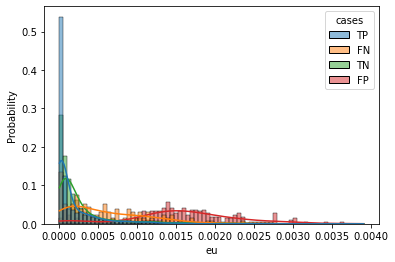

In [4]:
sns.histplot(data = result, x = 'eu', hue = 'cases', kde = True, stat = 'probability', common_norm=False)

In [5]:
# optimization test
from sklearn.metrics import f1_score, confusion_matrix
from typing import Optional

def evaluate(prob, au, eu, label, prob_threshold:float, au_threshold:Optional[float], eu_threshold:Optional[float]):
    
    if au_threshold is not None and eu_threshold is not None:
        cond = ((prob > prob_threshold) & (au < au_threshold) & (eu < eu_threshold)) # | ((prob <= prob_threshold) & (au >= au_threshold) & (eu >= eu_threshold))
    elif au_threshold is not None and eu_threshold is None:
        cond = ((prob > prob_threshold) & (au < au_threshold)) # | ((prob <= prob_threshold) & (au >= au_threshold))
    elif au_threshold is None and eu_threshold is not None:    
        cond = ((prob > prob_threshold) & (eu < eu_threshold)) # | ((prob <= prob_threshold) & (eu >= eu_threshold))
    else:
        cond = (prob > prob_threshold)
        
    pred = np.where(cond, 1, 0)
    conf = confusion_matrix(label, pred)
    pr = conf[1,1] / (conf[1,1] + conf[0,1])
    rc = conf[1,1] / (conf[1,1] + conf[1,0])
    
    # f1 = f1_score(label, pred, average = "macro")
    f1 = 2 * pr * rc / (pr + rc)
    
    return f1, pr, rc, conf

original - f1 : 0.848, pr : 0.819, rc : 0.878
maximum - f1 : 0.890, pr : 0.960, rc : 0.830, prob thres : 0.750


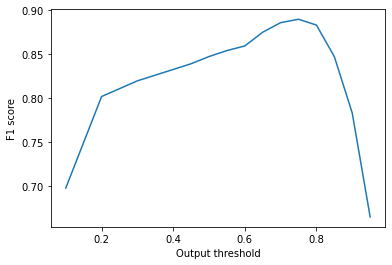

In [6]:
# tunig output threshold only
thresholds = np.array([0.1,0.2,0.3, 0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

f1_mesh = np.zeros((1, len(thresholds)))
pr_mesh = np.zeros((1, len(thresholds)))
rc_mesh = np.zeros((1, len(thresholds)))
prob_thres_mesh = np.zeros((1, len(thresholds)))

for idx_x, au_threshold in enumerate([None]):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, None, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

        prob_thres_mesh[idx_x, idx_y] = threshold

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)

idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc, prob_thres  = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max], prob_thres_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}, prob thres : {:.3f}".format(max_f1, pr, rc, prob_thres))

from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.plot(thresholds, f1_mesh.ravel())
plt.xlabel("Output threshold")
plt.ylabel("F1 score")
plt.savefig("./results/analysis_file/optimizing_output_threshold.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


original - f1 : 0.848, pr : 0.819, rc : 0.878
maximum - f1 : 0.891, pr : 0.956, rc : 0.834, prob thres : 0.550, au thres : 0.193


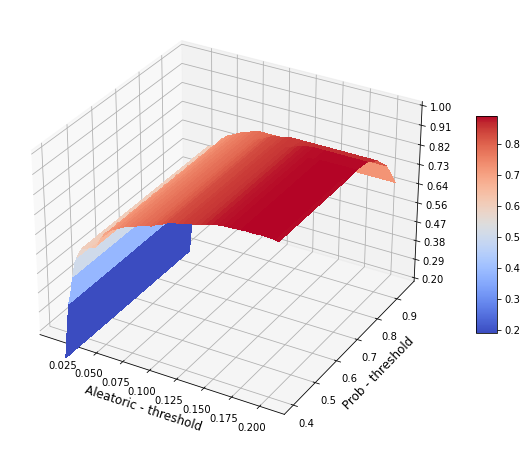

In [11]:
# aleatoric uncertainty
aus = np.array([0.01 + 0.0025 * i for i in range(0, 80)])
thresholds = np.array([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))
prob_thres_mesh = np.zeros((len(aus), len(thresholds)))
au_thres_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

        prob_thres_mesh[idx_x, idx_y] = threshold
        au_thres_mesh[idx_x, idx_y] = au_threshold

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)

idx_max = np.argmax(f1_mesh.ravel() * np.where(prob_thres_mesh.ravel() > 0.5,1,0))
max_f1, pr, rc, prob_thres, au_thres = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max], prob_thres_mesh.ravel()[idx_max], au_thres_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}, prob thres : {:.3f}, au thres : {:.3f}".format(max_f1, pr, rc, prob_thres, au_thres))

from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("Aleatoric - threshold", fontsize = 12)
ax.set_ylabel("Prob - threshold", fontsize = 12)
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.savefig("./results/analysis_file/optimizing_aleatoric_uncertainty.eps")
plt.savefig("./results/analysis_file/optimizing_aleatoric_uncertainty.png")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


original - f1 : 0.848, pr : 0.819, rc : 0.878
maximum - f1 : 0.902, pr : 0.958, rc : 0.853, prob thres : 0.650, eu thres : 0.001


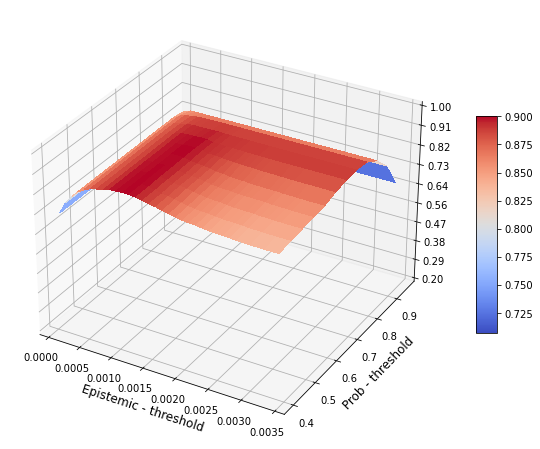

In [12]:
# epistemic uncertainty
eus = np.array([0.0001 * i for i in range(1, 35)])
thresholds = np.array([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

f1_mesh = np.zeros((len(eus), len(thresholds)))
pr_mesh = np.zeros((len(eus), len(thresholds)))
rc_mesh = np.zeros((len(eus), len(thresholds)))
prob_thres_mesh = np.zeros((len(eus), len(thresholds)))
eu_thres_mesh = np.zeros((len(eus), len(thresholds)))

for idx_x, eu_threshold in enumerate(eus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, None, eu_threshold)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc
        
        prob_thres_mesh[idx_x, idx_y] = threshold
        eu_thres_mesh[idx_x, idx_y] = eu_threshold
        
orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)

idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc, prob_thres, eu_thres = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max], prob_thres_mesh.ravel()[idx_max], eu_thres_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}, prob thres : {:.3f}, eu thres : {:.3f}".format(max_f1, pr, rc, prob_thres, eu_thres))

x_mesh, y_mesh = np.meshgrid(eus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("Epistemic - threshold", fontsize = 12)
ax.set_ylabel("Prob - threshold", fontsize = 12)
fig.colorbar(surf, shrink = 0.5, aspect = 10)
plt.savefig("./results/analysis_file/optimizing_epistemic_uncertainty.eps")
plt.savefig("./results/analysis_file/optimizing_epistemic_uncertainty.png")
plt.show()

### Warning time vs Detected shot ratio

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_result = pd.read_csv("./results/Bayes_TCN_warning_100_dist_40_Focal_Normal_Robust_TQ_seed_42/test_log.csv")

In [23]:
test_result.head()

,Unnamed: 0,shot,True,Missing,False,Warning
0,0,22959,1,0,0,0.598151
1,1,23013,1,0,0,0.229092
2,2,23035,1,0,0,0.075998
3,3,23507,1,0,0,0.247607
4,4,23808,0,1,0,0.022401


/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


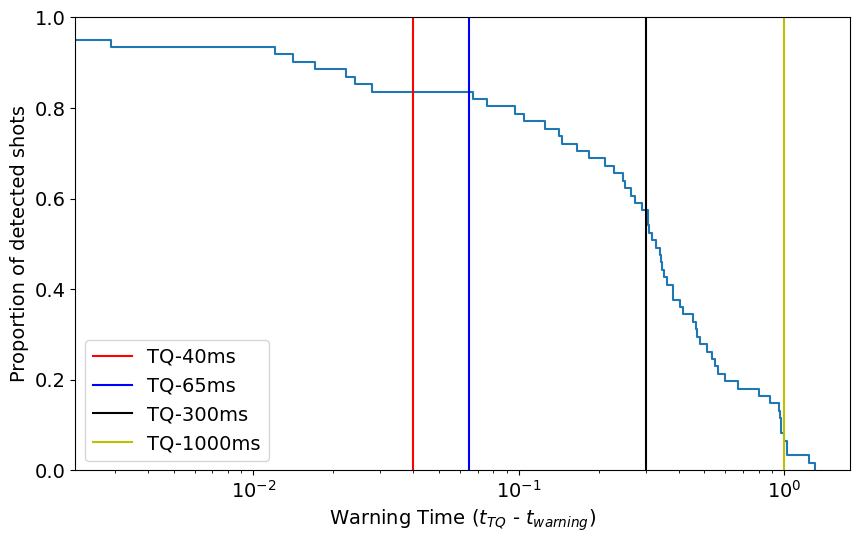

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6), dpi = 100)
sns.ecdfplot(data = test_result, x = 'Warning', stat = 'proportion', log_scale = True, complementary=True, legend = True)
plt.xlabel("Warning Time ($t_{TQ}$ - $t_{warning}$)", fontsize = 14)
plt.ylabel("Proportion of detected shots", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.axvline(x = 0.04, ymin = 0, ymax = 1, c = 'r', label = 'TQ-40ms')
plt.axvline(x = 0.065, ymin = 0, ymax = 1, c = 'b', label = 'TQ-65ms')
plt.axvline(x = 0.300, ymin = 0, ymax = 1, c = 'k', label = 'TQ-300ms')
plt.axvline(x = 1.000, ymin = 0, ymax = 1, c = 'y', label = 'TQ-1000ms')
plt.legend(fontsize = "14")
plt.savefig("./results/analysis_file/proportion_of_detected_shots.eps")
plt.savefig("./results/analysis_file/proportion_of_detected_shots.png")

In [20]:
result = pd.read_pickle("./results/analysis_feature_importance_test.pkl")

In [21]:
result['pred_mean'] = result['preds'].apply(lambda x : np.mean(x))
result.head()

,cases,shots,aus,eus,preds,q95,qmin,ipmhd,kappa,tritop,...,DL,HCM,TCI,LV,MP,RC,HA,HEATING,BOL,pred_mean
0,TP,25110,0.156351,0.000642,"[[0.7751772], [0.77787614], [0.77089286], [0.7...",0.224646,0.020429,0.002534,0.049127,0.037619,...,0.070203,0.053589,0.044964,0.053666,0.054283,0.055238,0.095070,0.149141,0.072077,0.774291
1,TP,24895,0.060578,0.000146,"[[0.9217949], [0.919408], [0.8970294], [0.8954...",0.208953,0.080645,0.020597,0.062554,0.015258,...,0.043310,0.036702,0.032237,0.036161,0.036227,0.039344,0.054025,0.085015,0.078465,0.907076
2,TP,29298,0.188251,0.000848,"[[0.740147], [0.77569306], [0.7736705], [0.740...",0.532622,0.060943,0.061952,0.043301,0.037745,...,0.016451,0.008029,0.003448,0.014239,0.014145,0.017346,0.024432,0.043508,0.021945,0.763693
3,TP,30052,0.051366,0.000029,"[[0.9550277], [0.94745475], [0.961109], [0.947...",0.112227,0.024859,0.015245,0.024516,0.017203,...,0.041455,0.030649,0.028661,0.022271,0.029593,0.024366,0.043012,0.069842,0.034233,0.953813
4,TP,22959,0.088389,0.000144,"[[0.90134394], [0.90844995], [0.8982153], [0.8...",0.058259,0.000000,0.026169,0.041701,0.027150,...,0.022005,0.020619,0.021155,0.021769,0.020061,0.020503,0.028132,0.037375,0.017440,0.904849


In [22]:
col_signals = [
    'q95', 'qmin', 'ipmhd',
    'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf',
    'aminor', 'drsep', 'rxpt1', 'zxpt1', 'rxpt2', 'zxpt2', 'nG', 'troyon',
    'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'MP', 'RC', 'HA', 'HEATING',
    'BOL'
]

In [23]:
factors = [col_signals[idx] for idx in np.argmax(result[col_signals].values, axis = 1)]
result['main causes'] = factors

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


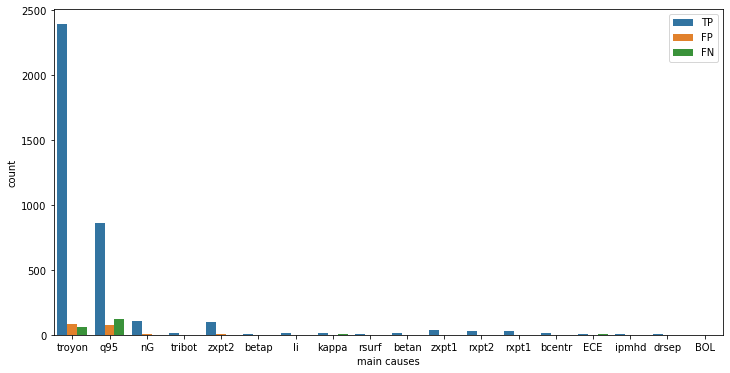

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data = result, x = "main causes", hue = "cases")
plt.legend(loc = 'upper right')
plt.savefig("./results/analysis_file/top_1_feature_importance.eps", facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)
plt.savefig("./results/analysis_file/top_1_feature_importance.png", facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)

In [31]:
topk = 5
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

<ipython-input-38-1d21a51a3ee5>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


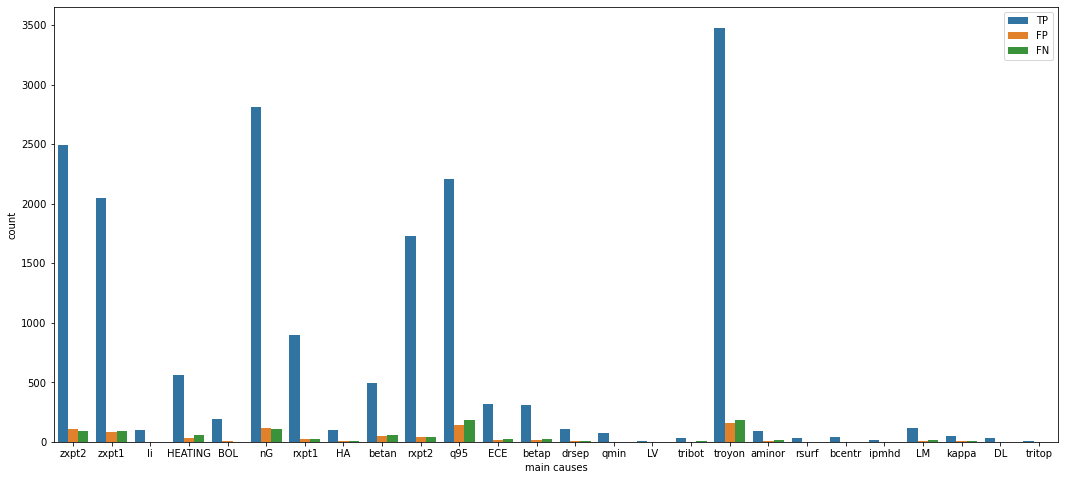

In [38]:
plt.figure(figsize=(18,8))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))
plt.legend(loc = 'upper right')
plt.savefig("./results/analysis_file/top_5_feature_importance.eps", facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)
plt.savefig("./results/analysis_file/top_5_feature_importance.png", facecolor = fig.get_facecolor(), edgecolor = 'none', transparent = False)

In [27]:
temp = pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])
LM_shot = temp[temp['main causes'] == 'LM'].shots.unique()
sorted(LM_shot)

<ipython-input-27-7c3dfc8a8b7d>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  temp = pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])


[24873,
 25189,
 25328,
 25341,
 25519,
 25522,
 25523,
 25524,
 25566,
 25626,
 25764,
 26044,
 26272,
 28478,
 29713,
 29760,
 29865,
 29970,
 29974,
 30223,
 30315,
 30366,
 31049,
 31496,
 31676]

<ipython-input-124-0401aa2d5f01>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))


<AxesSubplot:xlabel='main causes', ylabel='count'>

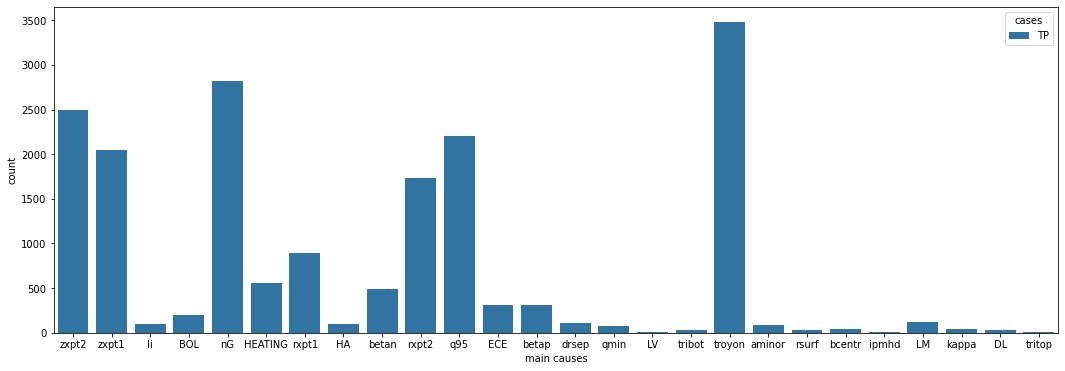

In [124]:
plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

<AxesSubplot:xlabel='main causes', ylabel='count'>

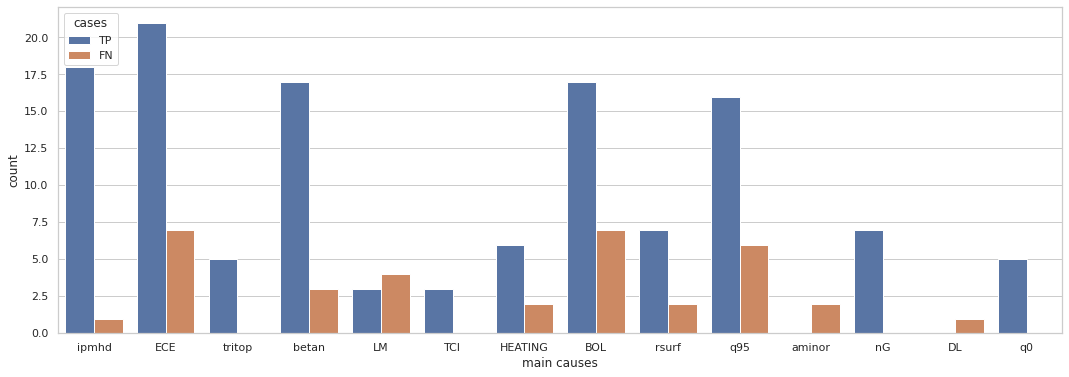

In [39]:
# LM cases detection
result = pd.read_pickle("./results/analysis_feature_importance_lm.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

topk = 5
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

<AxesSubplot:xlabel='main causes', ylabel='count'>

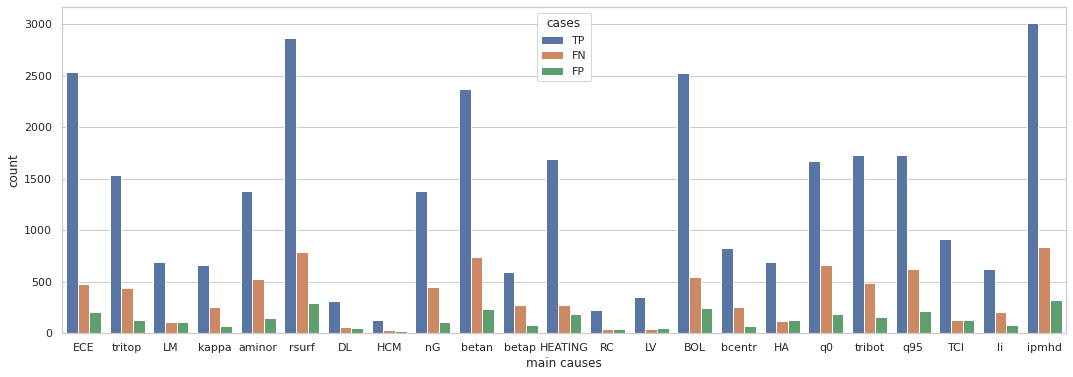

In [40]:
# LM cases detection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

result = pd.read_pickle("./results/analysis_feature_importance_total.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

topk = 10
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', hue_order=['TP','FN','FP'], data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

In [41]:
len(result.shots.unique())

949

In [42]:
result_topk = pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])
sorted(result_topk[(result_topk['cases'] == 'TP') & (result_topk['main causes'] == 'LM')].shots.unique())[0:10]

[20830, 20904, 20948, 20949, 20951, 20975, 20977, 20978, 20980, 21031]

In [43]:
result_topk[(result_topk.shots.isin([20941, 20945, 20947, 20948, 20949, 20951, 20975, 20977])) & (result_topk['cases'] == 'TP')  & (result_topk['main causes'] == 'LM')]

,cases,shots,variable,main causes
3808,TP,20949,cause-01,LM
5095,TP,20977,cause-02,LM
5685,TP,20977,cause-02,LM
7174,TP,20977,cause-02,LM
7996,TP,20951,cause-02,LM
8435,TP,20949,cause-03,LM
13022,TP,20948,cause-04,LM
27890,TP,20975,cause-07,LM
28033,TP,20975,cause-07,LM


<AxesSubplot:xlabel='main causes', ylabel='count'>

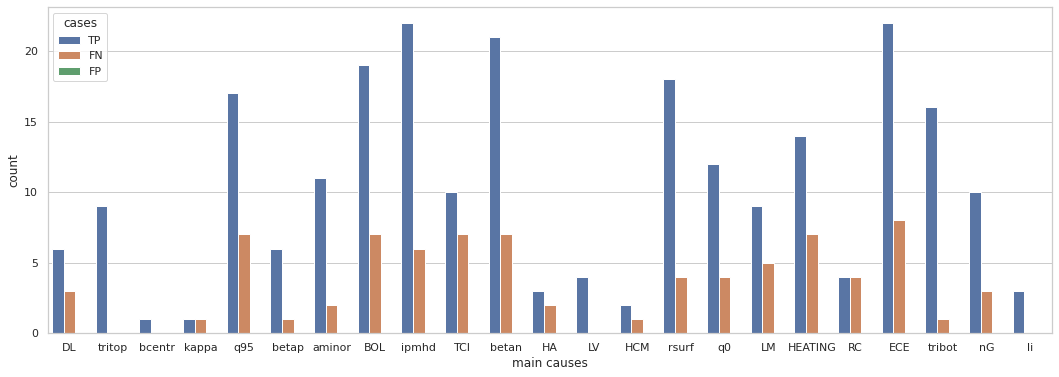

In [44]:
plt.figure(figsize=(18,6))
sns.countplot(
    x='main causes', 
    hue='cases', 
    hue_order=['TP', 'FN','FP'], 
    data= result_topk[(result_topk.shots.isin([20941, 20945, 20947, 20948, 20949, 20951, 20975, 20977]))]
)

### Uncertainty and threshold as hyper-parameters for predicting disruptions

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

result = pd.read_pickle("./results/analysis_feature_importance_test.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

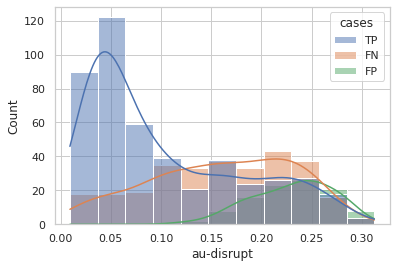

In [46]:
sns.histplot(data = result, x = 'au-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='eu-disrupt', ylabel='Count'>

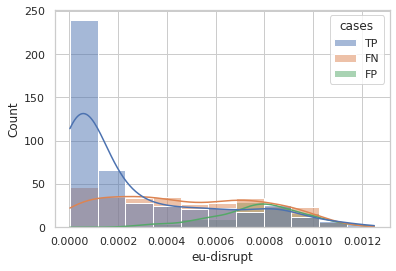

In [47]:
sns.histplot(data = result, x = 'eu-disrupt', hue = 'cases', kde = True)

In [48]:
result_modified = result.copy(deep = True)

In [49]:
result_modified['label'] = result_modified['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

In [50]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

conf = confusion_matrix(result_modified['label'], result_modified['preds'].apply(lambda x : 0 if x[:, 0].mean() > 0.5 else 1))
lr_pr, lr_rc, _ = precision_recall_curve(result_modified['label'], result_modified['preds'].apply(lambda x : x[:, 0].mean()))

In [51]:
pr = conf[0,0] / (conf[0,0] + conf[1,0])
rc = conf[0,0] / (conf[0,0] + conf[0,1])
f1 = f1_score(result_modified['label'], result_modified['preds'].apply(lambda x : 0 if x[:, 0].mean() > 0.5 else 1), average = "micro")
print("f1 : {}, pr : {}, rc : {}".format(f1, pr, rc))

f1 : 0.5583815028901734, pr : 0.8365896980461812, rc : 0.6189224704336399


In [82]:
from sklearn.metrics import f1_score

prob = result_modified['preds'].apply(lambda x : x[:, 0].mean())
au = result_modified['au-disrupt']
eu = result_modified['eu-disrupt']
label = result_modified['label']

from typing import Optional

def evaluate(prob, au, eu, label, prob_threshold:float, au_threshold:Optional[float], eu_threshold:Optional[float]):
    
    if au_threshold is not None and eu_threshold is not None:
        cond = ((prob > prob_threshold) & (au < au_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold) & (eu >= eu_threshold))
    elif au_threshold is not None and eu_threshold is None:
        cond = ((prob > prob_threshold) & (au < au_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold))
    elif au_threshold is None and eu_threshold is not None:    
        cond = ((prob > prob_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (eu >= eu_threshold))
    else:
        cond = (prob > prob_threshold)
        
    pred = np.where(cond, 0, 1)
    conf = confusion_matrix(label, pred)
    pr = conf[0,0] / (conf[0,0] + conf[1,0])
    rc = conf[0,0] / (conf[0,0] + conf[0,1])
    f1 = f1_score(label, pred, average = "micro")
    
    return f1, pr, rc, conf

aus = np.array([0.01 * i for i in range(1, 30)])
eus = np.array([0.0001 * i for i in range(1, 12)])
thresholds = np.array([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

In [83]:
orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)

idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

original - f1 : 0.558, pr : 0.837, rc : 0.619
maximum - f1 : 0.823, pr : 0.873, rc : 0.936


In [85]:
_, _, _, conf = evaluate(prob, au, eu, label, 0.95, 0.05, None)
conf

array([[712,  49],
       [104,   0]])

In [81]:
result['cases'].unique()

array(['TP', 'FN', 'FP'], dtype=object)

In [65]:
max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

threshold : 0.950, au-threshold: 0.050


<ipython-input-55-0fcd8215a1b0>:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


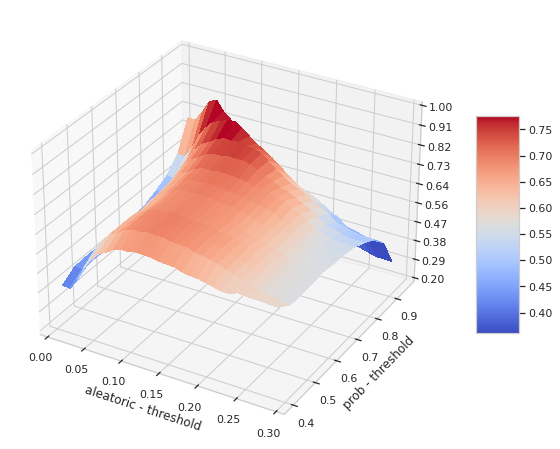

In [55]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

<ipython-input-56-3a6a67e076c7>:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


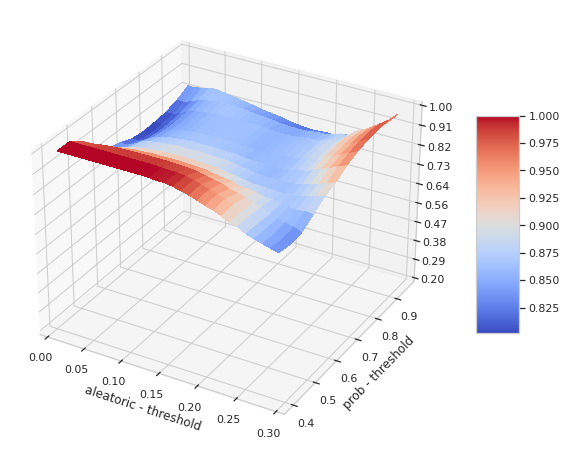

In [56]:
fig, ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, pr_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

<ipython-input-57-137ecaa5575c>:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


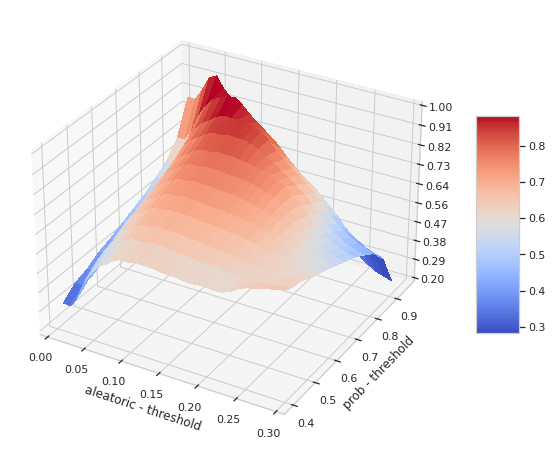

In [57]:
fig, ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, rc_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()